In [1]:
from tensorflow.keras.layers import Input, Dense, Reshape, Flatten, Dropout, concatenate, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization, Activation, ZeroPadding2D, Conv2DTranspose, Lambda
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.layers import UpSampling2D, Conv2D
from tensorflow.keras.models import Sequential, Model
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import pandas as pd
import matplotlib.pyplot as plt

In [2]:
physical_devices = tf.config.list_physical_devices('GPU')
print(physical_devices)
for gpu in physical_devices:
    tf.config.experimental.set_memory_growth(gpu, enable=True)

[]


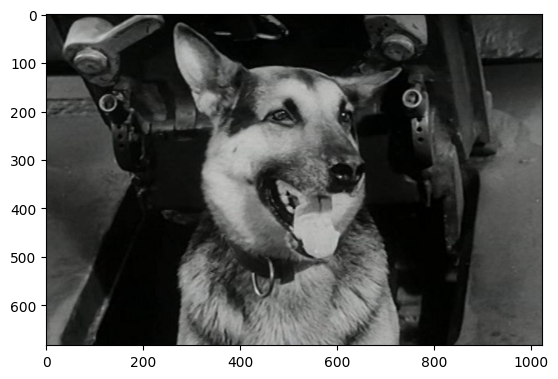

In [3]:
from PIL import Image
import requests
from io import BytesIO
import numpy as np
response = requests.get("https://bi.im-g.pl/im/13/ca/1c/z30190099IH,Szarik-z-serialu--Czterej-pancerni-i-pies-.jpg")
img = Image.open(BytesIO(response.content)).convert("RGB")
img_array = np.array(img)
plt.imshow(img_array)

Your grandpa has an old photo of his beloved dog from his childhood. He asked you if it's possible to colorize this greyscale picture. Can you train a CNN to add colors to an image?

In [4]:
# !wget http://vision.stanford.edu/aditya86/ImageNetDogs/images.tar
# !tar -xf images.tar

^C


Images/n02090379-redbone/n02090379_3427.jpg: Truncated tar archive detected while reading data: Unknown error
tar: Error exit delayed from previous errors.


In [ ]:
# Example, you can change it

datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.01,
    zoom_range=0.2,
    rotation_range=1,
    horizontal_flip=True
)

train_generator = datagen.flow_from_directory(
    "Images",
    target_size=(192, 192),  
    class_mode="input",
    batch_size=8,
    shuffle=True
)

In [ ]:
model = None

In [ ]:
x,y = train_generator.__getitem__(0)
pred = model.predict(x)
for i, img in enumerate(pred):
  plt.imshow((0.21 * img[...,:1]) + (0.72 * img[...,1:2]) + (0.07 * img[...,-1:]), cmap=plt.get_cmap('gray'))
  plt.title('greyscale')
  plt.show()
  plt.imshow(img)
  plt.title('prediction')
  plt.show()
  plt.imshow(x[i])
  plt.title('true')
  plt.show()
y.mean()